In [17]:
#import needed libraries in

import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#read in transactions dataset, explore
df = pd.read_csv('transactions.csv')

In [4]:
df.head()

,Unnamed: 0,customer_id,transaction_value,transaction_days_after_joining
0,0,0,5.0,1.0
1,1,0,2.0,16.0
2,2,0,10.0,31.0
3,3,0,8.0,46.0
4,4,0,9.0,61.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999714 entries, 0 to 999713
Data columns (total 4 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unnamed: 0                      999714 non-null  int64  
 1   customer_id                     999714 non-null  int64  
 2   transaction_value               999714 non-null  float64
 3   transaction_days_after_joining  999714 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 30.5 MB


In [239]:
df['transaction_value'].value_counts()

0.0      120896
1.0       63597
2.0       51258
3.0       43944
4.0       38668
          ...  
325.0         1
319.0         1
299.0         1
359.0         1
294.0         1
Name: transaction_value, Length: 346, dtype: int64

In [247]:
#Create a new column that groups and sums up "transaction days after joining" into monthly segments.
#This is to capture the monthly signal of customer's purchase behaviour and to attempt to predict that signal

df['month'] = df['transaction_days_after_joining'].apply(lambda x: math.ceil((x/30)))
df_t = df.drop(['Unnamed: 0', 'transaction_days_after_joining'], axis = 1)
df_t = df_t.groupby(['customer_id','month']).sum()

In [248]:
df_t

transaction_value
customer_id month                   
0           1                    7.0
            2                   18.0
            3                   28.0
            4                   46.0
            5                   15.0
...                              ...
99998       21                   0.0
            24                   0.0
            25                   8.0
            26                   7.0
99999       1                   49.0

[553076 rows x 1 columns]

In [252]:
df_t

transaction_value
customer_id month                   
0           1                    7.0
            2                   18.0
            3                   28.0
            4                   46.0
            5                   15.0
...                              ...
99998       21                   0.0
            24                   0.0
            25                   8.0
            26                   7.0
99999       1                   49.0

[553076 rows x 1 columns]

In [251]:
#df_y = df_t.reindex(labels = df_t.index.unique(level = 'month'), axis = 0, level = 1, fill_value=0)

unique_customers = df_t.index.unique(level='customer_id')

month_range = df_t.index.unique(level = 'month')

customer_date_index = pd.MultiIndex.from_product(iterables=[unique_customers, month_range], names=['customer_id', 'month'])

df_t = df_t.reindex(customer_date_index, fill_value=0)

TypeError: 'tuple' object cannot be interpreted as an integer

In [240]:
df_t.reset_index(inplace = True)

In [36]:
df_t.head()

,customer_id,month,transaction_value
0,0,1,7.0
1,0,2,18.0
2,0,3,28.0
3,0,4,46.0
4,0,5,15.0


In [181]:
df_c = pd.read_csv('customers.csv')

In [7]:
df_c.head()

,Unnamed: 0,customer_id,state,age,gender,income,is_married,promo_group_1,promo_group_2,customer_loyalty_index,brand_awareness_index
0,0,0,NJ,64,Female,65000.0,Y,A,X,0.058849,1.969644e-01
1,1,1,NY,26,Female,43000.0,Y,A,Z,-4.872865,2.970386e-14
2,2,2,NH,55,Female,93000.0,Y,C,X,NaN,NaN
3,3,3,ME,18,Female,68000.0,N,B,Z,0.152339,2.341961e-03
4,4,4,CA,41,Female,25000.0,N,A,Y,0.732875,8.073341e-14


In [8]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              100000 non-null  int64  
 1   customer_id             100000 non-null  int64  
 2   state                   85105 non-null   object 
 3   age                     100000 non-null  int64  
 4   gender                  100000 non-null  object 
 5   income                  85105 non-null   float64
 6   is_married              100000 non-null  object 
 7   promo_group_1           100000 non-null  object 
 8   promo_group_2           100000 non-null  object 
 9   customer_loyalty_index  85146 non-null   float64
 10  brand_awareness_index   85146 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 8.4+ MB


In [182]:
df_c.drop('Unnamed: 0', axis = 1, inplace = True)
df_join = df_t.join(df_c, on = 'customer_id', how = 'left', lsuffix = '_t')

In [183]:
df_join.head()

,customer_id_t,month,transaction_value,customer_id,state,age,gender,income,is_married,promo_group_1,promo_group_2,customer_loyalty_index,brand_awareness_index
0,0,1,7.0,0,NJ,64,Female,65000.0,Y,A,X,0.058849,0.196964
1,0,2,18.0,0,NJ,64,Female,65000.0,Y,A,X,0.058849,0.196964
2,0,3,28.0,0,NJ,64,Female,65000.0,Y,A,X,0.058849,0.196964
3,0,4,46.0,0,NJ,64,Female,65000.0,Y,A,X,0.058849,0.196964
4,0,5,15.0,0,NJ,64,Female,65000.0,Y,A,X,0.058849,0.196964


In [184]:
df_join.drop(['customer_id'], axis =1, inplace = True)

In [45]:
df_join.head()

,customer_id_t,month,transaction_value,state,age,gender,income,is_married,promo_group_1,promo_group_2,customer_loyalty_index,brand_awareness_index
0,0,1,7.0,NJ,64,Female,65000.0,Y,A,X,0.058849,0.196964
1,0,2,18.0,NJ,64,Female,65000.0,Y,A,X,0.058849,0.196964
2,0,3,28.0,NJ,64,Female,65000.0,Y,A,X,0.058849,0.196964
3,0,4,46.0,NJ,64,Female,65000.0,Y,A,X,0.058849,0.196964
4,0,5,15.0,NJ,64,Female,65000.0,Y,A,X,0.058849,0.196964


In [152]:
df_join['promo_group_2'].value_counts()

Y    185486
Z    184442
X    183148
Name: promo_group_2, dtype: int64

In [185]:
df_final = pd.get_dummies(df_join, columns= ['state','gender', 'is_married', 'promo_group_1', 'promo_group_2'], drop_first=True)

In [186]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553076 entries, 0 to 553075
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   customer_id_t           553076 non-null  int64  
 1   month                   553076 non-null  int64  
 2   transaction_value       553076 non-null  float64
 3   age                     553076 non-null  int64  
 4   income                  470950 non-null  float64
 5   customer_loyalty_index  470251 non-null  float64
 6   brand_awareness_index   470251 non-null  float64
 7   state_FL                553076 non-null  uint8  
 8   state_GA                553076 non-null  uint8  
 9   state_MA                553076 non-null  uint8  
 10  state_ME                553076 non-null  uint8  
 11  state_NH                553076 non-null  uint8  
 12  state_NJ                553076 non-null  uint8  
 13  state_NY                553076 non-null  uint8  
 14  state_TX            

In [187]:
df_final.isnull().sum()

customer_id_t                 0
month                         0
transaction_value             0
age                           0
income                    82126
customer_loyalty_index    82825
brand_awareness_index     82825
state_FL                      0
state_GA                      0
state_MA                      0
state_ME                      0
state_NH                      0
state_NJ                      0
state_NY                      0
state_TX                      0
gender_Male                   0
gender_Other                  0
is_married_Y                  0
promo_group_1_B               0
promo_group_1_C               0
promo_group_2_Y               0
promo_group_2_Z               0
dtype: int64

In [188]:
#df_final.dropna(inplace = True)

#df_final['income'].replace(np.NaN, df_final['income'].mean(), inplace = True)
#df_final['customer_loyalty_index'].replace(np.NaN, df_final['customer_loyalty_index'].mean(), inplace = True)
#df_final['brand_awareness_index'].replace(np.NaN, df_final['brand_awareness_index'].mean(), inplace = True)

from sklearn.linear_model import LinearRegression
linreg_i = LinearRegression()
linreg_c = LinearRegression()
linreg_b = LinearRegression()

data = df_final[['age', 'state_FL', 'state_GA', 'state_MA', 'state_ME', 'state_NH', 'state_NJ', 'state_NY', 'state_TX',
                'gender_Male', 'gender_Other', 'is_married_Y', 'income', 'customer_loyalty_index', 'brand_awareness_index']]

data_without_null = data.dropna()

train_data_x = data_without_null.iloc[:, :12]

train_data_i = data_without_null.iloc[:, 12]
train_data_c = data_without_null.iloc[:, 13]
train_data_b = data_without_null.iloc[:, 14]

linreg_i.fit(train_data_x, train_data_i)
linreg_c.fit(train_data_x, train_data_c)
linreg_b.fit(train_data_x, train_data_b)

test_data_x = data.iloc[:, :12]

income = pd.Series(linreg_i.predict(test_data_x))
customer_loyalty_index = pd.Series(linreg_c.predict(test_data_x))
brand_awareness_index = pd.Series(linreg_b.predict(test_data_x))

df_final.income.fillna(income, inplace = True)
df_final.customer_loyalty_index.fillna(customer_loyalty_index, inplace = True)
df_final.brand_awareness_index.fillna(brand_awareness_index, inplace = True)

df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553076 entries, 0 to 553075
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   customer_id_t           553076 non-null  int64  
 1   month                   553076 non-null  int64  
 2   transaction_value       553076 non-null  float64
 3   age                     553076 non-null  int64  
 4   income                  553076 non-null  float64
 5   customer_loyalty_index  553076 non-null  float64
 6   brand_awareness_index   553076 non-null  float64
 7   state_FL                553076 non-null  uint8  
 8   state_GA                553076 non-null  uint8  
 9   state_MA                553076 non-null  uint8  
 10  state_ME                553076 non-null  uint8  
 11  state_NH                553076 non-null  uint8  
 12  state_NJ                553076 non-null  uint8  
 13  state_NY                553076 non-null  uint8  
 14  state_TX            

In [219]:
X = df_final.drop('transaction_value', axis = 1).values
y = df_final['transaction_value'].values

In [220]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [232]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()

model.add(Dense(22, activation='relu'))
#model.add(Dropout(0.3))

model.add(Dense(19, activation='relu'))

model.add(Dense(16, activation='relu'))
#model.add(Dropout(0.3))

model.add(Dense(8, activation='relu'))

model.add(Dense(4, activation='relu'))

model.add(Dense(1, activation = 'linear'))

model.compile(optimizer='adam', loss = 'mse')

In [233]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 10)

model.fit(x = X_train, y = y_train, 
          validation_data = (X_test,y_test),
          callbacks = [early_stop],
         batch_size = 128, epochs = 400)

Epoch 1/400
3025/3025 [==============================] - 12s 3ms/step - loss: 1586.9574 - val_loss: 1314.7874
Epoch 2/400
3025/3025 [==============================] - 10s 3ms/step - loss: 1300.2720 - val_loss: 1279.6444
Epoch 3/400
3025/3025 [==============================] - 9s 3ms/step - loss: 1279.1003 - val_loss: 1268.1757
Epoch 4/400
3025/3025 [==============================] - 9s 3ms/step - loss: 1271.2817 - val_loss: 1263.9364
Epoch 5/400
3025/3025 [==============================] - 8s 3ms/step - loss: 1265.7173 - val_loss: 1257.3502
Epoch 6/400
3025/3025 [==============================] - 8s 3ms/step - loss: 1262.8665 - val_loss: 1254.3757
Epoch 7/400
3025/3025 [==============================] - 9s 3ms/step - loss: 1259.6683 - val_loss: 1273.1036
Epoch 8/400
3025/3025 [==============================] - 9s 3ms/step - loss: 1257.2595 - val_loss: 1250.3657
Epoch 9/400
3025/3025 [==============================] - 10s 3ms/step - loss: 1254.5093 - val_loss: 1251.8385
Epoch 10/400
302

KeyboardInterrupt: 

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses.plot()

In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [227]:
predictions = model.predict(X_test)

In [228]:
mean_squared_error(y_test,predictions)

1248.0731080737414

In [229]:
np.sqrt(mean_squared_error(y_test,predictions))

35.32807818256948

In [230]:
explained_variance_score(y_test, predictions)

0.41486413364122743

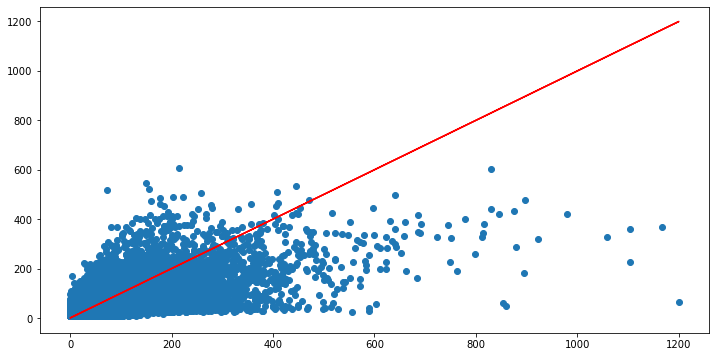

In [231]:
plt.figure(figsize = (12,6))
plt.scatter(y_test,predictions)
plt.plot(y_test, y_test, 'r')

In [74]:
import xgboost
from xgboost import XGBRegressor


In [145]:
xgb_model = XGBRegressor(n_estimators= 1000, max_depth = 20, learning_rate= 0.05, subsample= 0.3)

xgb_model.fit(X_train, y_train, eval_metric = 'rmse', eval_set=[(X_test, y_test)], early_stopping_rounds=10, verbose= True)

[0]	validation_0-rmse:55.68611
[1]	validation_0-rmse:54.17349
[2]	validation_0-rmse:52.74717
[3]	validation_0-rmse:51.42257
[4]	validation_0-rmse:50.17553
[5]	validation_0-rmse:49.03712
[6]	validation_0-rmse:47.98183
[7]	validation_0-rmse:47.01467
[8]	validation_0-rmse:46.08902
[9]	validation_0-rmse:45.23901
[10]	validation_0-rmse:44.45876
[11]	validation_0-rmse:43.73014
[12]	validation_0-rmse:43.07458
[13]	validation_0-rmse:42.44975
[14]	validation_0-rmse:41.87705
[15]	validation_0-rmse:41.33506
[16]	validation_0-rmse:40.85697
[17]	validation_0-rmse:40.39903
[18]	validation_0-rmse:39.97876
[19]	validation_0-rmse:39.57888
[20]	validation_0-rmse:39.23697
[21]	validation_0-rmse:38.90934
[22]	validation_0-rmse:38.60983
[23]	validation_0-rmse:38.33895
[24]	validation_0-rmse:38.07298
[25]	validation_0-rmse:37.84079
[26]	validation_0-rmse:37.64015
[27]	validation_0-rmse:37.45550
[28]	validation_0-rmse:37.28328
[29]	validation_0-rmse:37.13279
[30]	validation_0-rmse:36.99787
[31]	validation_0-

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=20,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.3,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [146]:
predictions = xgb_model.predict(X_test)

explained_variance_score(y_test, predictions)

0.40671267119480925

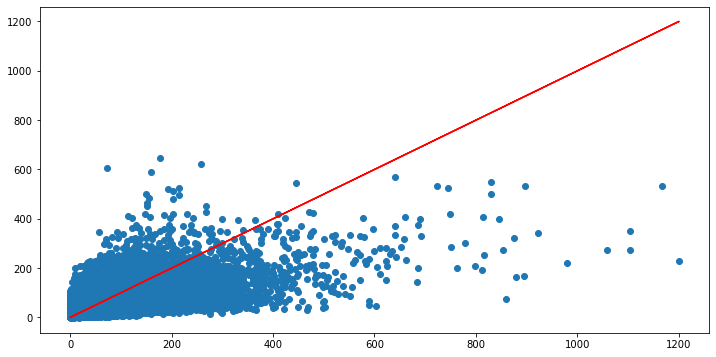

In [147]:
plt.figure(figsize = (12,6))
plt.scatter(y_test,predictions)
plt.plot(y_test, y_test, 'r')

In [153]:
from sklearn.svm import SVR
svr_model = SVR()

svr_model.fit(X_train,y_train)

SVR()

In [154]:
predictions = svr_model.predict(X_test)

In [155]:
explained_variance_score(y_test, predictions)

0.2881069270648038